In [1]:
# Notebook responsible for training and evaluating machine learning models to sort tracks into playlists.

import spotipy
import numpy as np
import pandas as pd

In [2]:
# Read audio features data from csv file
audio_features = pd.read_csv('data/tracks.csv')

# Drop unnecessary columns
audio_features = audio_features.drop(columns=['uri', 'track_href', 'analysis_url', 'type', 'time_signature', 'mode'])

In [4]:
# Convert genre_playlist column to categorical
audio_features['genre_playlist'] = pd.Categorical(audio_features['genre_playlist'])
audio_features['genre_playlist'] = audio_features['genre_playlist'].cat.codes

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,genre_playlist,name,artist
0,0.754,0.785,10,-8.178,0.1800,0.0287,0.00144,0.3190,0.821,94.123,0XgpiStoxq1IJncYlPrvZ5,296267,5,Runnin',The Pharcyde
1,0.843,0.585,1,-14.268,0.0652,0.6400,0.04560,0.1310,0.835,91.937,1BXastKgdI3AiFipVt69Fv,279373,5,Jettin',Digable Planets
2,0.758,0.845,2,-8.021,0.2720,0.1210,0.00000,0.3280,0.944,76.882,1KcZRMyC2tSs3CMIsng9wx,321507,5,Otha Fish,The Pharcyde
3,0.884,0.334,1,-18.943,0.2280,0.0476,0.05880,0.1070,0.571,98.315,26q6YTrXt9l8qshIveiTX9,261267,5,Rebirth Of Slick (Cool Like Dat),Digable Planets
4,0.876,0.420,0,-18.246,0.2790,0.1880,0.00186,0.0668,0.706,98.304,1962ZwEY7WNQLcmYFn3eR9,275342,5,Where I'm From,Digable Planets


In [8]:
# Create new dataframe with only the features we want to use
features = audio_features[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo','duration_ms']]
features.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,duration_ms
0,0.0287,0.754,0.785,0.00144,0.3190,-8.178,0.1800,0.821,94.123,296267
1,0.6400,0.843,0.585,0.04560,0.1310,-14.268,0.0652,0.835,91.937,279373
2,0.1210,0.758,0.845,0.00000,0.3280,-8.021,0.2720,0.944,76.882,321507
3,0.0476,0.884,0.334,0.05880,0.1070,-18.943,0.2280,0.571,98.315,261267
4,0.1880,0.876,0.420,0.00186,0.0668,-18.246,0.2790,0.706,98.304,275342


In [9]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, audio_features['genre_playlist'], test_size=0.2, random_state=42)

In [10]:
# Use scaler to scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Create a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(122.15577034883722, 210.645, 'X[6] <= -0.447\ngini = 0.775\nsamples = 256\nvalue = [15, 79, 26, 8, 8, 12, 20, 83, 5]'),
 Text(37.39735465116279, 197.055, 'X[0] <= -1.082\ngini = 0.753\nsamples = 128\nvalue = [10, 54, 18, 7, 7, 1, 3, 24, 4]'),
 Text(9.343255813953489, 183.465, 'X[7] <= -0.436\ngini = 0.406\nsamples = 8\nvalue = [6, 0, 0, 0, 0, 0, 0, 1, 1]'),
 Text(6.228837209302326, 169.875, 'X[2] <= 1.187\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 1, 1]'),
 Text(3.114418604651163, 156.285, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 1, 0]'),
 Text(9.343255813953489, 156.285, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(12.457674418604652, 169.875, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(65.4514534883721, 183.465, 'X[7] <= -1.475\ngini = 0.729\nsamples = 120\nvalue = [4, 54, 18, 7, 7, 1, 3, 23, 3]'),
 Text(18.686511627906977, 169.875, 'X[8] <= -0.591\ngini = 0.521\nsamples = 13\nvalue = [0, 4, 0, 0, 

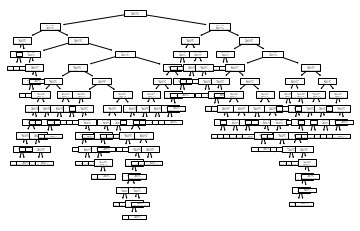

In [12]:
# Display the decision tree
plot_tree(clf)

In [14]:
# Create a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Evaluate the model
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, clf.predict(X_test))
print(acc)

0.35384615384615387


In [16]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, clf.predict(X_test))
print(matrix)

[[ 1  0  0  0  0  1  2  0]
 [ 0 11  3  2  0  0  4  0]
 [ 0  3  0  3  0  1  1  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  2  0  0  1  0  2  0]
 [ 0  0  0  1  1  0  5  0]
 [ 0  7  0  0  0  1  9  0]
 [ 0  0  0  0  0  0  0  1]]
